# Case study on unsupervised learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [4]:
wine=pd.read_csv(r"C:\Users\sreeh\Downloads\Wine_clust .csv")
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
wine.shape

(178, 13)

# Deciding the centroid

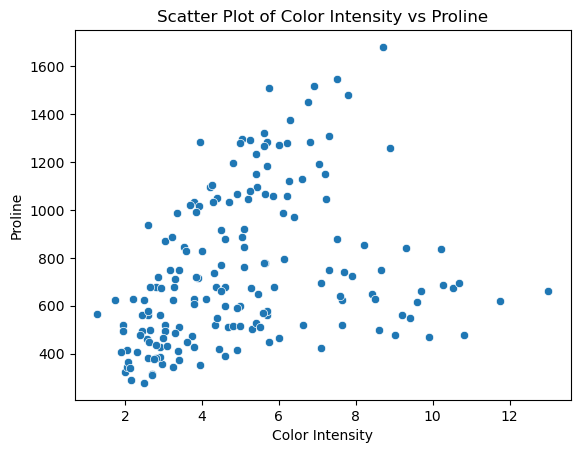

In [7]:
sns.scatterplot(x='Color_Intensity', y='Proline', data=wine)
plt.title('Scatter Plot of Color Intensity vs Proline')
plt.xlabel('Color Intensity')
plt.ylabel('Proline')
plt.show()

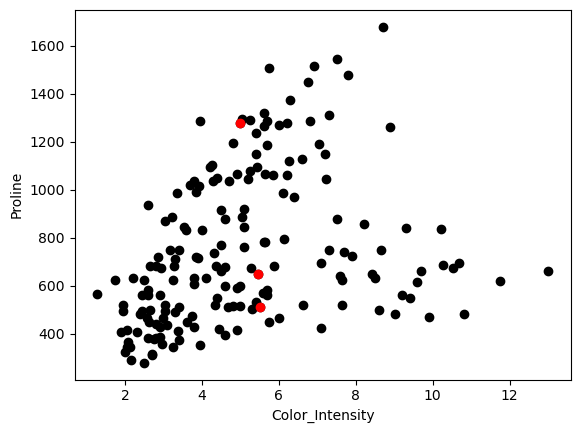

In [8]:
X=wine[['Color_Intensity','Proline']]
K=3
Centroids=(X.sample(n=K))
plt.scatter(X['Color_Intensity'],X['Proline'],c='black')
plt.scatter(Centroids['Color_Intensity'],Centroids['Proline'],c='red')
plt.xlabel('Color_Intensity')
plt.ylabel('Proline')
plt.show()

# KMeans 

In [9]:
from sklearn.cluster import KMeans

In [10]:
K=3
kmeans=KMeans(n_clusters=K,random_state=0)
X['Cluster']=kmeans.fit_predict(X[['Color_Intensity','Proline']])

In [11]:
X.head()

,Color_Intensity,Proline,Cluster
0,5.64,1065,1
1,4.38,1050,1
2,5.68,1185,1
3,7.80,1480,1
4,4.32,735,2


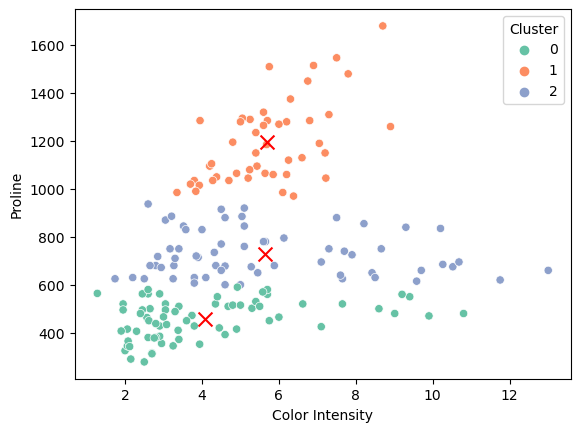

In [12]:
centroids=kmeans.cluster_centers_
sns.scatterplot(data=X,x='Color_Intensity',y='Proline',hue='Cluster',palette='Set2')
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='x',s=100)
plt.xlabel('Color Intensity')
plt.ylabel('Proline')
plt.show()

In [13]:
inertia=kmeans.inertia_
print(inertia)

2338699.071535064


# Find the optimum value

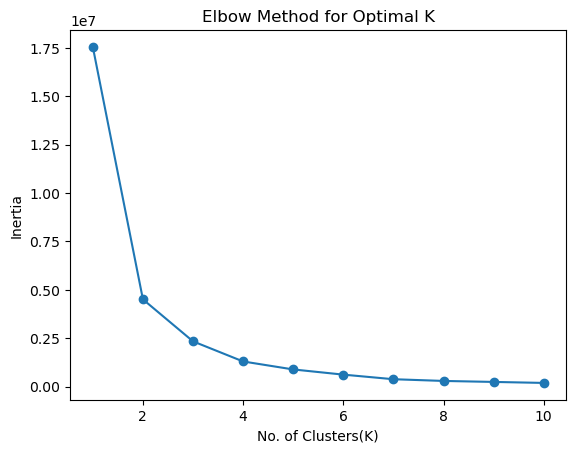

In [14]:
K_range=range(1,11)
inertia_values=[]
for K in K_range:
    kmeans=KMeans(n_clusters=K,random_state=0)
    kmeans.fit(X[['Color_Intensity','Proline']])
    inertia=kmeans.inertia_
    inertia_values.append(inertia)
    
plt.plot(K_range,inertia_values,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('No. of Clusters(K)')
plt.ylabel('Inertia')
plt.show()

In [15]:
X=wine
optimal_k=4
kmeans=KMeans(n_clusters=optimal_k,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(X)
kmeans

KMeans(n_clusters=4, n_init=10, random_state=0)

In [16]:
cluster_labels=kmeans.labels_
cluster_labels

array([1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 1, 3, 3, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 3, 3, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 1, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0])

# Hierarchial Clustering

In [17]:
import scipy.cluster.hierarchy as sch

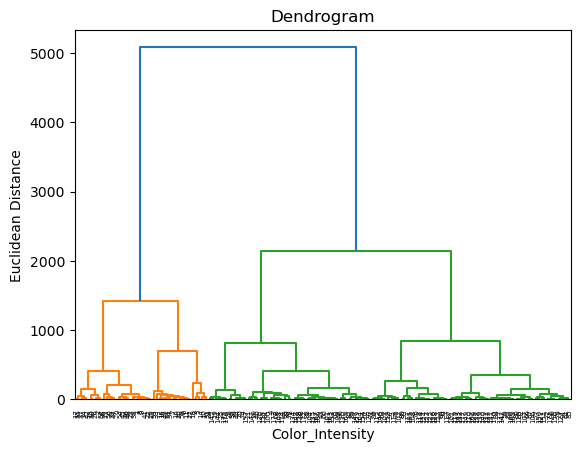

In [18]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Color_Intensity')
plt.ylabel('Euclidean Distance')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [20]:
y_hc

array([3, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 1, 0, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 0, 2, 0, 4, 4, 0,
       2, 2, 0, 0, 0, 4, 2, 3, 0, 4, 4, 2, 0, 2, 4, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 4, 4, 3, 0, 4, 0, 4, 0, 2, 4, 4, 0, 4, 2, 2, 4, 0,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 0, 2, 4, 4, 4, 4, 4, 2, 4, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 4, 0, 0, 2, 2, 2, 4, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int64)

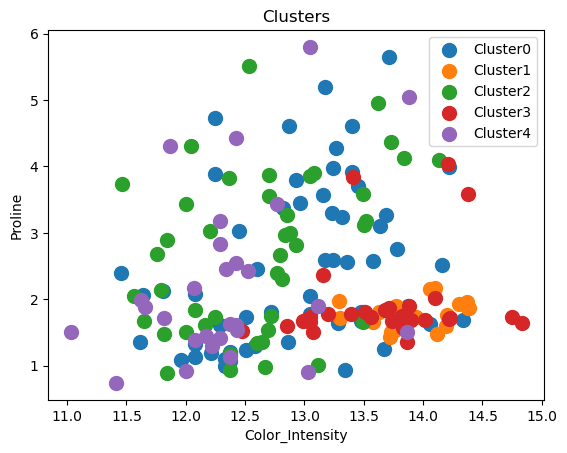

In [21]:
X_np=X.values
for cluster_label in range(5):
    plt.scatter(X_np[y_hc==cluster_label,0],X_np[y_hc==cluster_label,1],s=100,label=f'Cluster{cluster_label}')
                
plt.title('Clusters')
plt.xlabel('Color_Intensity')
plt.ylabel('Proline')
plt.legend()
plt.show()  

# DBScan

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
X=wine[['Color_Intensity','Proline']]
dbscan=DBSCAN(eps=0.5,min_samples=5)

In [24]:
dbscan.fit(X)

DBSCAN()

In [25]:
DBSCAN()

DBSCAN()

In [26]:
wine['dbscan_cluster']=dbscan.labels_

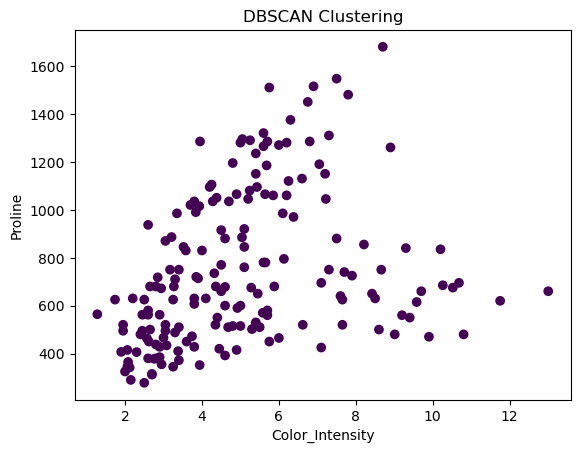

In [27]:
plt.scatter(wine['Color_Intensity'],wine['Proline'],c=wine['dbscan_cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('Color_Intensity')
plt.ylabel('Proline')
plt.show()